In [1]:
%matplotlib inline
import matplotlib.pylab as pylab

import pymc as mc

import pandas as pd
import numpy as np
import datetime

In [2]:
import vpfits

In [3]:
vpfit = vpfits.VPfit()

clouds, wavelength_array = vpfits.mock_absorption(n=3, plot=False)

onesigmaerror = 0.02
noise = np.random.normal(0.0, onesigmaerror, len(wavelength_array))
flux_array = vpfit.Absorption(sum(clouds['tau'])) + noise

vpfit.fit(wavelength_array, flux_array, 3)

 [-----------------100%-----------------] 10000 of 10000 complete in 17.9 sec
Took: 0:00:17.868051  to finish.


In [4]:
print vpfit.MAP.BIC
print vpfit.MAP.AIC

-9730.45805985
-9786.46708445


In [7]:
print vpfit.mcmc.BPIC
print vpfit.mcmc.DIC

-9782.79642284
-9789.85021009


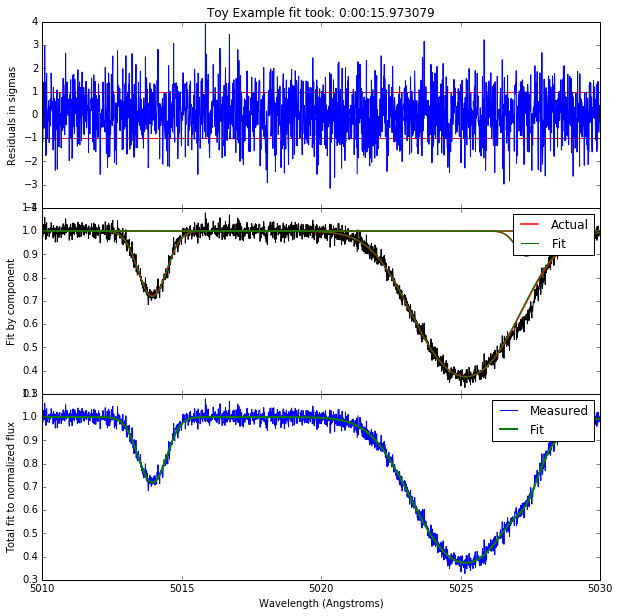

In [11]:
vpfit.plot(wavelength_array, flux_array, clouds, n=3)

# VPfit function

In [10]:
vpfit_1 = vpfits.VPfit()
vpfit_1.fit(wavelength_array, flux_array, 1)

 [-----------------100%-----------------] 10000 of 10000 complete in 7.0 sec
Took: 0:00:07.027057  to finish.


In [11]:
vpfit_2 = vpfits.VPfit()
vpfit_2.fit(wavelength_array, flux_array, 2)

 [-----------------100%-----------------] 10000 of 10000 complete in 12.0 sec
Took: 0:00:12.048723  to finish.


In [12]:
print vpfit_1.mcmc.BPIC
print vpfit_2.mcmc.BPIC

-5131.83335393
-9770.65861094


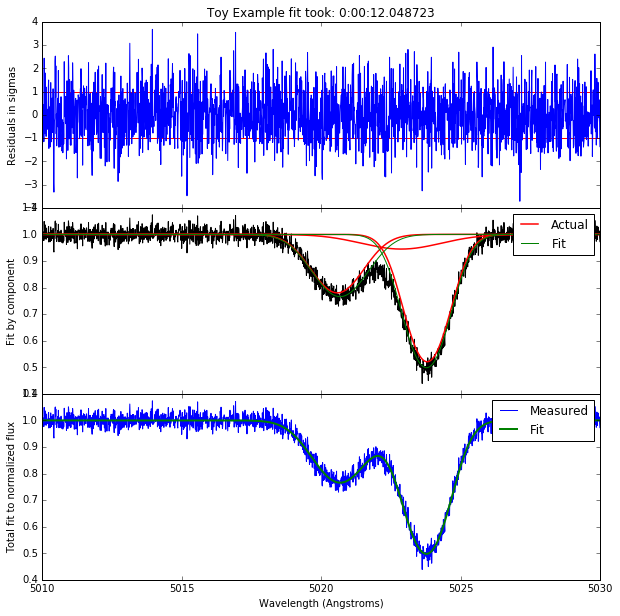

In [13]:
vpfit_2.plot(wavelength_array, flux_array, clouds, n=2)

## Find best fit

In [18]:
r = 0
n = 1
vpfit_2 = vpfits.VPfit()
vpfit_2.fit(wavelength_array, flux_array, n)

while r < 0.95:
    
    print "n: ", n
    
    vpfit_1 = vpfit_2
    
    vpfit_2 = vpfits.VPfit()
    vpfit_2.fit(wavelength_array, flux_array, n+1)
    
    print vpfit_1.mcmc.BPIC
    print vpfit_2.mcmc.BPIC
    
    print vpfit_1.mcmc.BPIC / vpfit_2.mcmc.BPIC
    
    r = vpfit_1.mcmc.BPIC / vpfit_2.mcmc.BPIC
    
    n += 1
    

 [-----------------100%-----------------] 10000 of 10000 complete in 6.8 sec
Took: 0:00:06.753093  to finish.
n:  1
 [-----------------100%-----------------] 10000 of 10000 complete in 11.1 sec
Took: 0:00:11.084339  to finish.
-5132.24843118
-9769.53375239
0.52533197195
n:  2
 [-----------------100%-----------------] 10000 of 10000 complete in 15.2 sec
Took: 0:00:15.152768  to finish.
-9769.53375239
-9780.98448048
0.998829286755


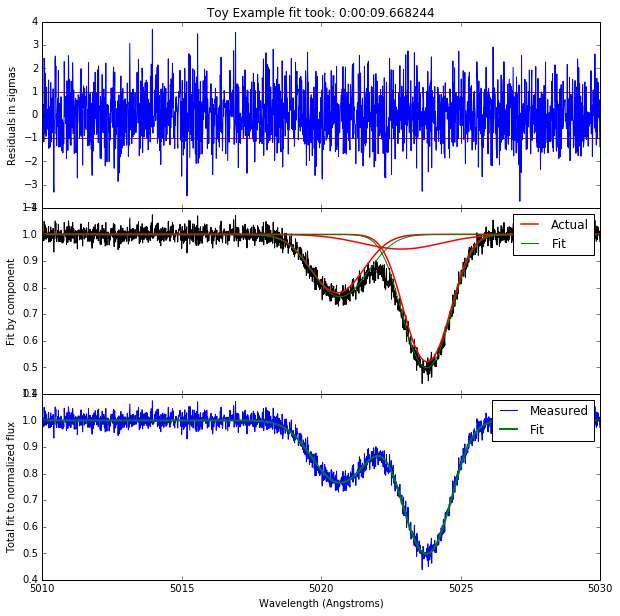

In [17]:
vpfit_1.plot(wavelength_array, flux_array, clouds, n-1)